In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
X = np.load("./dataset/X.npy")
Y = np.load("./dataset/Y.npy")

# Dataset shapes
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")


In [6]:

# Normalize the images
X = X / 255.0

# Split into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {Y_train.shape}")
print(f"Validation set: {X_val.shape}, {Y_val.shape}")
print(f"Test set: {X_test.shape}, {Y_test.shape}")


Training set: (1443, 64, 64), (1443, 10)
Validation set: (309, 64, 64), (309, 10)
Test set: (310, 64, 64), (310, 10)


In [7]:

# Build the neural network
model = Sequential([
    Flatten(input_shape=(64, 64)),  # Flatten the 64x64 images
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)


C:\Users\benny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0901 - loss: 2.3043 - val_accuracy: 0.0971 - val_loss: 2.3050
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1087 - loss: 2.3002 - val_accuracy: 0.1165 - val_loss: 2.3056
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1188 - loss: 2.3014 - val_accuracy: 0.0971 - val_loss: 2.3060
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1104 - loss: 2.2992 - val_accuracy: 0.1036 - val_loss: 2.3033
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1074 - loss: 2.2991 - val_accuracy: 0.1068 - val_loss: 2.3005
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1317 - loss: 2.2947 - val_accuracy: 0.0939 - val_loss: 2.2954
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1585 - loss: 2.2892 - val_accuracy: 0.0809 - val_loss: 2.2917
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1303 - loss: 2.2835 - val_accuracy: 0.1553 - val_los

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2681 - loss: 2.2109 
Test Accuracy: 27.74%
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


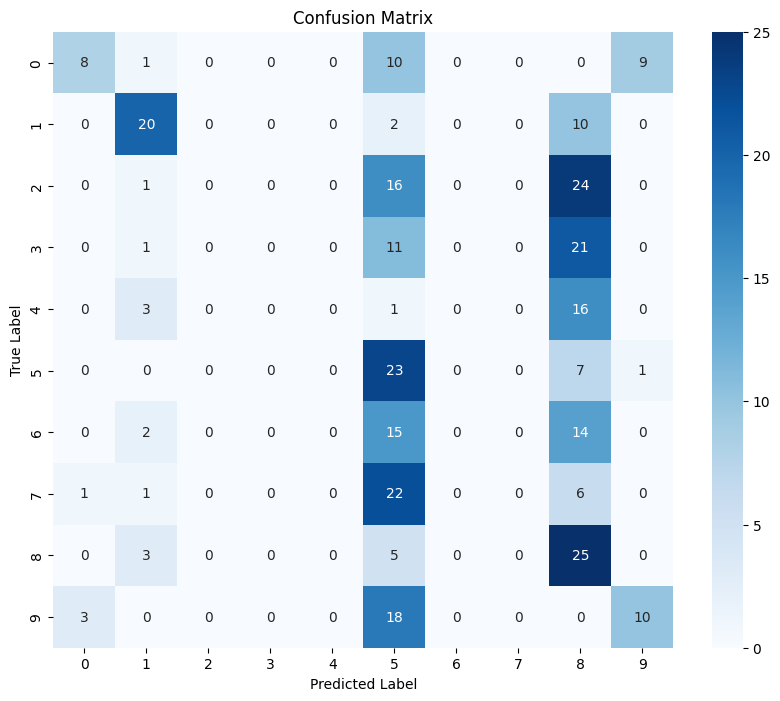

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        28
           1       0.62      0.62      0.62        32
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        20
           5       0.19      0.74      0.30        31
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        30
           8       0.20      0.76      0.32        33
           9       0.50      0.32      0.39        31

    accuracy                           0.28       310
   macro avg       0.22      0.27      0.20       310
weighted avg       0.22      0.28      0.20       310



C:\Users\benny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [8]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_true_classes, Y_pred_classes))


In [9]:

# Function to predict and count digits in a new set of images
def predict_and_count(images, model):
    images = images / 255.0  # Normalize
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    counts = np.bincount(predicted_classes, minlength=10)
    
    for digit, count in enumerate(counts):
        print(f"Digit {digit}: {count} instances")
    return counts

# Example usage
# Provide a subset of test images
sample_images = X_test[:20]
counts = predict_and_count(sample_images, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 20 instances
Digit 1: 0 instances
Digit 2: 0 instances
Digit 3: 0 instances
Digit 4: 0 instances
Digit 5: 0 instances
Digit 6: 0 instances
Digit 7: 0 instances
Digit 8: 0 instances
Digit 9: 0 instances
